In [17]:

try:
    from bs4 import BeautifulSoup
    import pandas as pd
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas

import requests

1 - I decided to extract data about the top rated television programs during September 2003 to May 2004. I opened and parsed my webpage, which was a Wikipedia page listing the top rated TV programs in the US, each season for the past 7 decades

In [11]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/Top-rated_United_States_television_programs_by_season#")
bs = BeautifulSoup(opened_webpage.content, "html.parser")

2 - found all the tables in the Wikipedia page that was opened and parased, printed the data from those tables

In [12]:
rawdata = []
table = bs.find_all("table")

for row in table:
    line = row.text
    rawdata.append(line)

print(rawdata)

["\n\n\nOctober 1950–April 1951\n\n\n\nRank\nProgram\nNetwork\nRating\n\n\n1\nTexaco Star Theater\nNBC\n61.6\n\n\n2\nFireside Theatre\n52.6\n\n\n3\nPhilco TV Playhouse\n45.3\n\n\n4\nYour Show of Shows\n42.6\n\n\n5\nThe Colgate Comedy Hour\n42.0\n\n\n6\nGillette Cavalcade of Sports\n41.3\n\n\n7\nThe Lone Ranger\nABC\n41.2\n\n\n8\nArthur Godfrey's Talent Scouts\nCBS\n40.6\n\n\n9\nHopalong Cassidy\nNBC\n39.9\n\n\n10\nMama\nCBS\n39.7\n\n\n11\nRobert Montgomery Presents\nNBC\n38.8\n\n\n12\nMartin Kane, Private Eye\n37.8\n\n\n13\nMan Against Crime\nCBS\n37.4\n\n\n14\nKraft Television Theatre\nNBC\n37.0\n\n\n15\nThe Toast of the Town\nCBS\n36.5\n\n\n16\nThe Aldrich Family\nNBC\n36.1\n\n\n17\nYou Bet Your Life\n36.0\n\n\n18\nArthur Godfrey and His Friends\nCBS\n35.9\n\n\n19\nArmstrong Circle Theatre\nNBC\n35.6\n\n\nLights Out\n\n\nBig Town\nCBS\n\n\n22\nThe Alan Young Show\n34.4\n\n\n23\nStop the Music\nABC\n34.0\n\n\n24\nStudio One\nCBS\n33.8\n\n\n25\nThe Big Story\nNBC\n33.7\n\n\n26\nPabst B

3 - narrowed down the amount of tables by making sure each table had the word program; any extra table was not included

In [13]:
url="https://en.wikipedia.org/wiki/Top-rated_United_States_television_programs_by_season#2000s"
df = pd.read_html(url,match="Program")

to transform my data, I printed a dataframe. Since I wanted to focus on the top television programs during the season of September 2003 to May 2004, I needed to get rid of all the extra date about the other seasons. I did this by creating a data of the 81st table in the Wikipedia page, which was the table that held the info about the season of September 2003 to May 2004.

In [14]:
mydf = df[80]
print(mydf)

    Rank                            Program Network  Rating
0      1     CSI: Crime Scene Investigation     CBS    15.9
1      2            American Idol — Tuesday     FOX    14.9
2      3          American Idol — Wednesday     FOX    14.1
3      4                            Friends     NBC    13.6
4      5                     The Apprentice     NBC    13.0
5      6                                 ER     NBC    12.9
6      7                           Survivor     CBS    12.3
7      8                         CSI: Miami     CBS    11.9
8      9              Monday Night Football     ABC    11.2
9      9            Everybody Loves Raymond     CBS    11.2
10    11                    Without a Trace     CBS    11.1
11    12                        Law & Order     NBC    10.8
12    13                       Will & Grace     NBC    10.4
13    14        My Big Fat Obnoxious Fiance     FOX     9.9
14    14                 Two and a Half Men     CBS     9.9
15    16                         60 Minu

In [15]:
mydf.to_csv (r'Downloads\USTV.csv')

finally, I decided to create a bar graph that showed the names of the the top rated TV programs, and their ratings.

<AxesSubplot:xlabel='Program'>

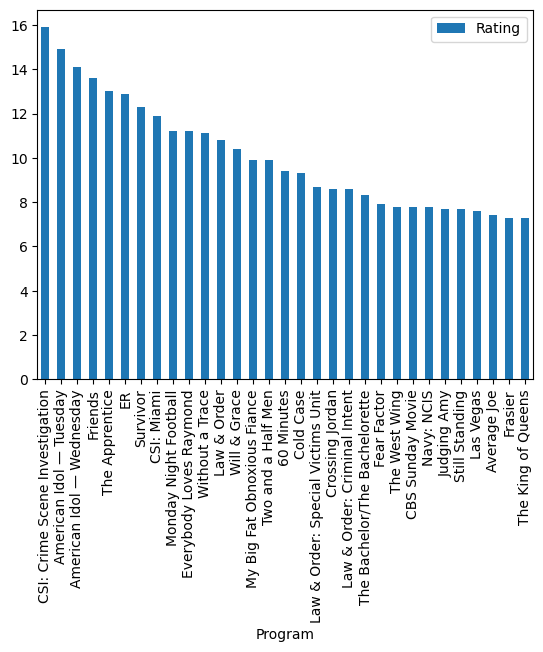

In [14]:
mydf.plot.bar(x='Program', y='Rating')

Descriptive Statistics:The highest rating from this data set is 15.9, while the lowest is 7.3. This covered a range of 8.6
Insights:I noticed that the 2nd and 3rd highest rated programs were both American Idol, however, these were listed twice as it aired on different days.